In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
ann08= pd.read_csv("../datasets/4i-raw/scdata_and_conditions_MelTimecourse_CD_8h_raw.csv")
ann24= pd.read_csv("../datasets/4i-raw/scdata_and_conditions_MelTimecourse_CD_24h_raw.csv")

In [11]:
def compute_growth_factor(ann):
    n_cells_per_well=pd.DataFrame(ann.groupby(["row", "col"]).count()["Nuclei_Morphology_Area"]).rename(columns={"Nuclei_Morphology_Area": "n_cells"})

    # max = mean --> per well only one value for "Condition"
    assert (ann.groupby(["row", "col"]).max()["Condition"]==ann.groupby(["row", "col"]).min()["Condition"]).all()
    condition_per_well = pd.DataFrame(ann.groupby(["row", "col"]).max()["Condition"])

    apop_per_well = pd.DataFrame(ann.groupby(["row", "col"]).mean()[["class_apop", "class_prolif"]])
    apop_per_well["class_apop"] = 1 - apop_per_well["class_apop"]

    well_stats = n_cells_per_well.join(condition_per_well, how="left")
    well_stats = well_stats.join(apop_per_well, how="left")
    
    well_stats["growth_factor"] = well_stats["n_cells"] / well_stats[well_stats["Condition"] == "Control"]["n_cells"].mean()
    well_stats[well_stats["Condition"] == "Control"]
    growth_stats_per_drug = well_stats.groupby("Condition").mean().reset_index()
    growth_stats_per_drug["Condition"]=growth_stats_per_drug["Condition"].astype(str)
    return growth_stats_per_drug

In [12]:
growth_stats_per_drug_08 = compute_growth_factor(ann08)
growth_stats_per_drug_24 = compute_growth_factor(ann24)

growth_stats_per_drug = pd.merge(growth_stats_per_drug_08, growth_stats_per_drug_24, on="Condition", suffixes=("_08h", "_24h"))

In [13]:
growth_stats_per_drug.filter(regex="growth|Condition").to_csv("../datasets/4i/growth_rates.csv")

## Visualization for 8h

In [14]:
ann = ann08
n_cells_per_well=pd.DataFrame(ann.groupby(["row", "col"]).count()["Nuclei_Morphology_Area"]).rename(columns={"Nuclei_Morphology_Area": "n_cells"})

# max = mean --> per well only one value for "Condition"
assert (ann.groupby(["row", "col"]).max()["Condition"]==ann.groupby(["row", "col"]).min()["Condition"]).all()
condition_per_well = pd.DataFrame(ann.groupby(["row", "col"]).max()["Condition"])

apop_per_well = pd.DataFrame(ann.groupby(["row", "col"]).mean()[["class_apop", "class_prolif"]])
apop_per_well["class_apop"] = 1 - apop_per_well["class_apop"]

well_stats = n_cells_per_well.join(condition_per_well, how="left")
well_stats = well_stats.join(apop_per_well, how="left")

well_stats["growth_factor"] = well_stats["n_cells"] / well_stats[well_stats["Condition"] == "Control"]["n_cells"].mean()
well_stats[well_stats["Condition"] == "Control"]
growth_stats_per_drug = well_stats.groupby("Condition").mean().reset_index()
growth_stats_per_drug["Condition"]=growth_stats_per_drug["Condition"].astype(str)

Text(0.5, 1.0, 'Number of cells per well')

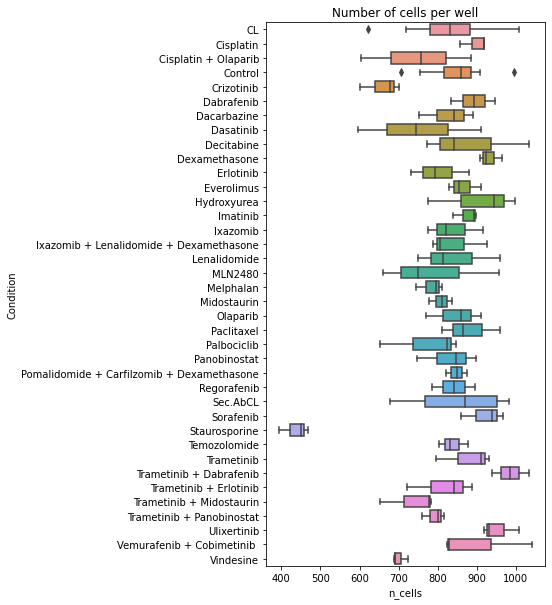

In [15]:
plt.figure(figsize=(5,10))
sns.boxplot(data=well_stats, y="Condition", x="n_cells", order=np.unique(well_stats["Condition"]))
plt.title("Number of cells per well")

Text(0.5, 1.0, 'Number of cells per well / mean(control)')

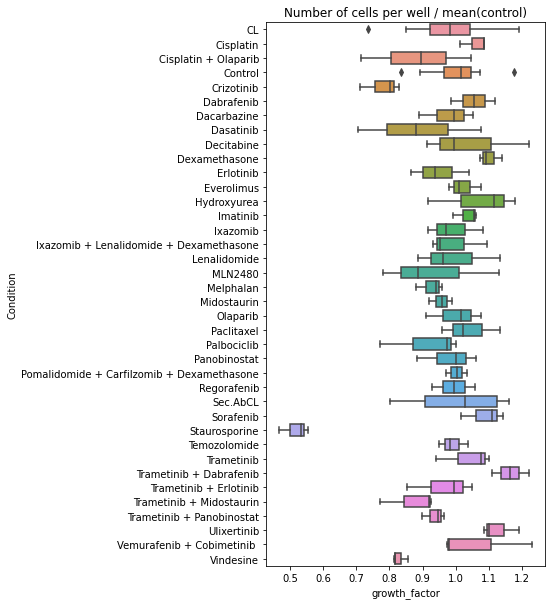

In [16]:
# looks exactly like the one from Gabriele
plt.figure(figsize=(5,10))
sns.boxplot(data=well_stats, y="Condition", x="growth_factor", order=np.unique(well_stats["Condition"]))
plt.title("Number of cells per well / mean(control)")